In [16]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/transformers/facebook-bart-large/config.json
/kaggle/input/transformers/facebook-bart-large/tokenizer.json
/kaggle/input/transformers/facebook-bart-large/pytorch_model.bin
/kaggle/input/transformers/bert-large-uncased/config.json
/kaggle/input/transformers/bert-large-uncased/tokenizer.json
/kaggle/input/transformers/bert-large-uncased/pytorch_model.bin
/kaggle/input/transformers/roberta-base/config.json
/kaggle/input/transformers/roberta-base/tokenizer.json
/kaggle/input/transformers/roberta-base/pytorch_model.bin
/kaggle/input/transformers/distilroberta-base/config.json
/kaggle/input/transformers/distilroberta-base/tokenizer.json
/kaggle/input/transformers/distilroberta-base/pytorch_model.bin
/kaggle/input/transformers/distilbert-base-uncased/config.json
/kaggle/input/transformers/distilbert-base-uncased/tokenizer.json
/kaggle/input/transformers/distilbert-base-uncased/pytorch_model.bin
/kaggle/input/transformers/xlnet-base-cased/config.json
/kaggle/input/transformers/xl

## This notebook used the huggingFace tutorial notebook: Iterate like a grandmaster!
    https://www.kaggle.com/code/jhoward/iterate-like-a-grandmaster/#Special-tokens

In [17]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from wordcloud import WordCloud, STOPWORDS

In [18]:
# load train file into df
train= pd.read_csv('../input/us-patent-phrase-to-phrase-matching/train.csv')
test= pd.read_csv('../input/us-patent-phrase-to-phrase-matching/test.csv')

In [19]:
# Checking dataset types
print(len(train))
print(train.head(10))
print(train.dtypes)

36473
                 id     anchor                  target context  score
0  37d61fd2272659b1  abatement  abatement of pollution     A47   0.50
1  7b9652b17b68b7a4  abatement          act of abating     A47   0.75
2  36d72442aefd8232  abatement         active catalyst     A47   0.25
3  5296b0c19e1ce60e  abatement     eliminating process     A47   0.50
4  54c1e3b9184cb5b6  abatement           forest region     A47   0.00
5  067203128142739c  abatement        greenhouse gases     A47   0.25
6  061d17f04be2d1cf  abatement          increased rate     A47   0.25
7  e1f44e48399a2027  abatement       measurement level     A47   0.25
8  0a425937a3e86d10  abatement       minimising sounds     A47   0.50
9  ef2d4c2e6bbb208d  abatement   mixing core materials     A47   0.25
id          object
anchor      object
target      object
context     object
score      float64
dtype: object


In [20]:
# Checking dataset unique values
print(train.context.unique())
print(train.context.nunique())
print(train.score.unique())

['A47' 'A61' 'A62' 'C01' 'F16' 'F24' 'F28' 'H01' 'H04' 'B23' 'B41' 'D03'
 'E03' 'C08' 'D01' 'D21' 'C07' 'A45' 'B01' 'B08' 'G04' 'G06' 'B65' 'G16'
 'G01' 'A41' 'C23' 'F23' 'B25' 'A63' 'B28' 'B63' 'F04' 'B60' 'B32' 'C09'
 'C02' 'G03' 'C10' 'B61' 'C21' 'F42' 'A23' 'C11' 'B29' 'F02' 'B62' 'B64'
 'E21' 'B24' 'B22' 'H05' 'B27' 'E04' 'B21' 'D06' 'C04' 'B05' 'G02' 'H03'
 'C06' 'G11' 'C12' 'E02' 'F15' 'A46' 'B66' 'G07' 'G08' 'C22' 'B44' 'A01'
 'F03' 'C25' 'F22' 'G05' 'G21' 'B07' 'F41' 'E01' 'H02' 'C13' 'F01' 'F27'
 'C14' 'A44' 'B67' 'A24' 'B02' 'E05' 'D05' 'F25' 'A43' 'A22' 'A21' 'E06'
 'F21' 'G10' 'C03' 'B81' 'F17' 'B03' 'G09' 'D04' 'F26' 'B31']
106
[0.5  0.75 0.25 0.   1.  ]


In [21]:
# checking missing values
train.isna().sum()

id         0
anchor     0
target     0
context    0
score      0
dtype: int64

In [22]:
# How many targets for each anchor
g= train.groupby(['anchor'])['target'].count().sort_values(ascending=False)
g.head()

anchor
component composite coating    152
sheet supply roller            150
source voltage                 140
perfluoroalkyl group           136
el display                     135
Name: target, dtype: int64

### Generate word cloud

In [23]:
stopwords = set(STOPWORDS)

In [25]:
wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords,
     max_words=400,
    max_font_size=40, 
    scale=12,
    random_state=1
).generate(str(set(train['anchor'])))

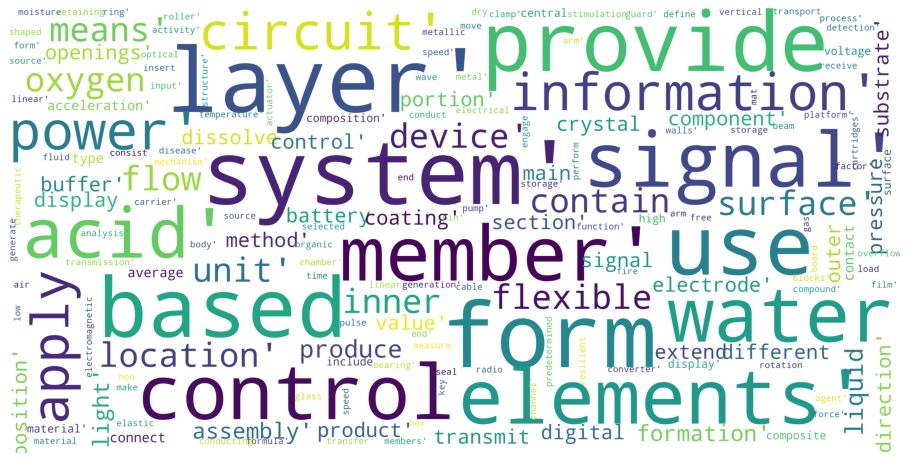

In [26]:
fig = plt.figure(1, figsize=(16,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

<AxesSubplot:xlabel='score'>

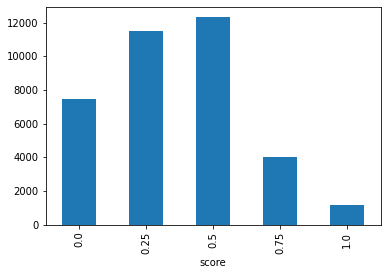

In [27]:
# how many lines with zero, 0.25, 0,75, 1 similarity scores 
train.groupby(['score'])['anchor'].count().plot(kind='bar')

<AxesSubplot:xlabel='context'>

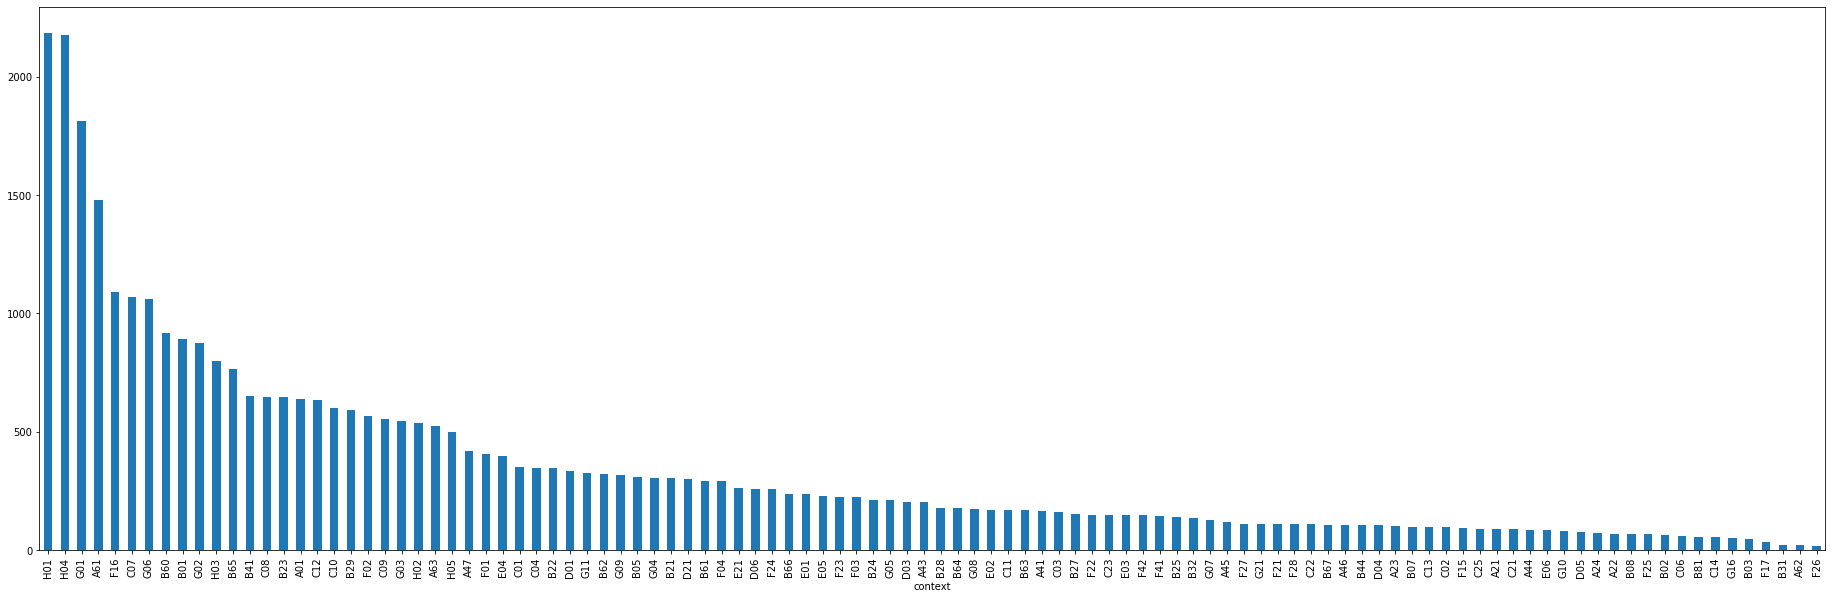

In [28]:
# how many instances of each context 
fig = plt.figure(1, figsize=(32,10))
train.groupby(['context'])['anchor'].count().sort_values(ascending=False).plot(kind= 'bar')